### Importing libraries & functions


In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_excel('./a_Dataset_CreditScoring.xlsx')

### Data preparation


In [8]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [9]:
# shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [10]:
# dropping customer ID column from the dataset
dataset = dataset.drop('ID', axis=1)
dataset.shape

(3000, 29)

In [11]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [12]:
# filling missing values with mean
dataset = dataset.fillna(dataset.mean())

In [13]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [ ]:
# # count of good loans (0) and bad loans (1)
# dataset['TARGET'].value_counts()

In [ ]:
# # data summary across 0 & 1
# dataset.groupby('TARGET').mean()

### Train Test Split


In [14]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [15]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(
    sc, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f2_Normalisation_CreditScoring')

['/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f2_Normalisation_CreditScoring']

### Risk Model building


In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f1_Classifier_CreditScoring')

['/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f1_Classifier_CreditScoring']

### Model _performance_


In [18]:
print(confusion_matrix(y_test, y_pred))

[[487  13]
 [ 87  13]]


In [19]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


### Writing output file


In [20]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61644691, 0.38355309],
       [0.9885656 , 0.0114344 ],
       [0.87069686, 0.12930314],
       ...,
       [0.94450568, 0.05549432],
       [0.46756903, 0.53243097],
       [0.94014209, 0.05985791]])

In [23]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(
    classifier.predict(X_test), columns=['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test, columns=['Actual Outcome'])

dfx = pd.concat([df_test_dataset, df_prediction_prob,
                df_prediction_target], axis=1)

dfx.to_csv("./surafel.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.616447,0.383553,0
1,0,0.988566,0.011434,0
2,1,0.870697,0.129303,0
3,0,0.953963,0.046037,0
4,1,0.726633,0.273367,0


### Coding ends here!


In [25]:
import pandas as pd
import numpy as np

# Assume dfx is your DataFrame
# Replace this with the actual name of your DataFrame
# dfx = ...

# Sort the DataFrame by 'prob_1' in descending order
dfx_sorted = dfx.sort_values(by='prob_1', ascending=False)

# Calculate deciles for the entire DataFrame
dfx_sorted['decile'] = pd.qcut(
    dfx_sorted['prob_1'], q=10, labels=np.arange(1, 11))

# Display the DataFrame with deciles
# print(dfx_sorted)
# Display the DataFrame with deciles
print(dfx_sorted)

# Save the DataFrame to a new CSV file with deciles
dfx_sorted.to_csv("./c1_Model_Prediction_with_Deciles.csv",
                  sep=',', encoding='UTF-8', index=False)

     Actual Outcome    prob_0    prob_1  predicted_TARGET decile
104               0  0.082870  0.917130                 1     10
324               0  0.128689  0.871311                 1     10
468               1  0.229662  0.770338                 1     10
88                1  0.238601  0.761399                 1     10
306               1  0.248319  0.751681                 1     10
..              ...       ...       ...               ...    ...
51                0  0.988229  0.011771                 0      1
1                 0  0.988566  0.011434                 0      1
542               0  0.988810  0.011190                 0      1
379               0  0.989580  0.010420                 0      1
308               0  0.990029  0.009971                 0      1

[600 rows x 5 columns]


/tmp/ipykernel_26179/3790675408.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_counts = dfx_sorted.groupby(['decile', 'Actual Outcome']).size().unstack()


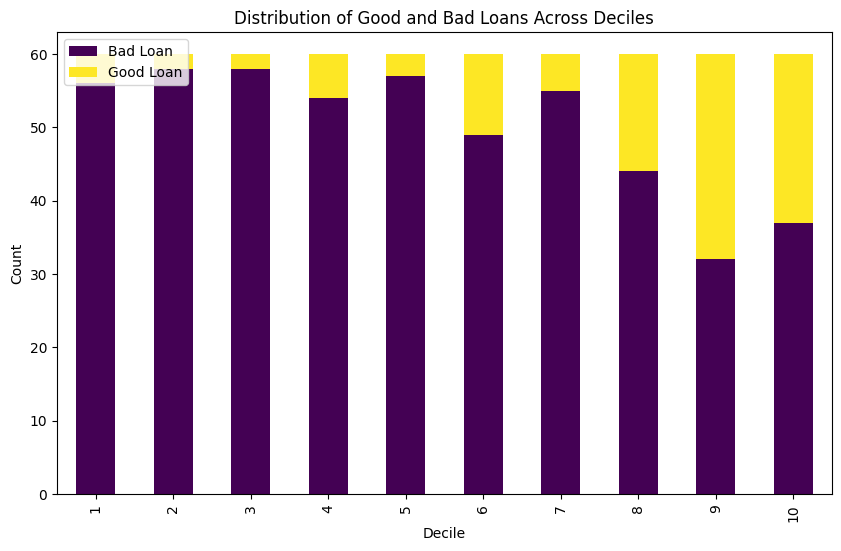

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Group by decile and count the number of good and bad loans
decile_counts = dfx_sorted.groupby(
    ['decile', 'Actual Outcome']).size().unstack()

# Plot a bar chart
ax = decile_counts.plot(kind='bar', stacked=True,
                        colormap='viridis', figsize=(10, 6))
ax.set_xlabel('Decile')
ax.set_ylabel('Count')
ax.set_title('Distribution of Good and Bad Loans Across Deciles')
ax.legend(['Bad Loan', 'Good Loan'], loc='upper left')
plt.show()

/tmp/ipykernel_26179/612004271.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_counts = dfx_sorted.groupby(['decile', 'Actual Outcome']).size().unstack()


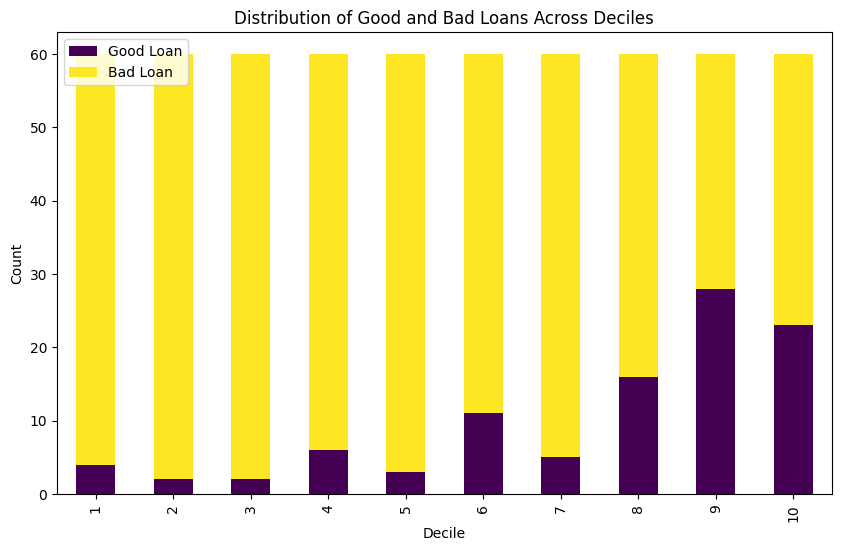

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Map the 'Actual Outcome' values to represent good (0) and bad (1) loans
dfx_sorted['Actual Outcome'] = dfx_sorted['Actual Outcome'].map(
    {0: 'Good Loan', 1: 'Bad Loan'})

# Group by decile and count the number of good and bad loans
decile_counts = dfx_sorted.groupby(
    ['decile', 'Actual Outcome']).size().unstack()

# Plot a bar chart
ax = decile_counts.plot(kind='bar', stacked=True,
                        colormap='viridis', figsize=(10, 6))
ax.set_xlabel('Decile')
ax.set_ylabel('Count')
ax.set_title('Distribution of Good and Bad Loans Across Deciles')
ax.legend(['Good Loan', 'Bad Loan'], loc='upper left')
plt.show()

/tmp/ipykernel_26179/1880903723.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_stats = dfx_sorted.groupby('decile').agg(


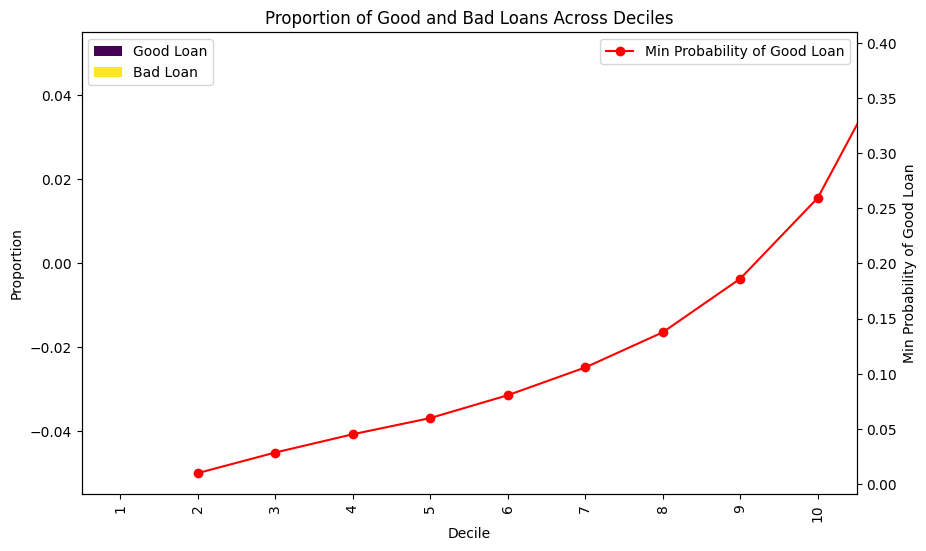

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Map the 'Actual Outcome' values to represent good (0) and bad (1) loans
dfx_sorted['Actual Outcome'] = dfx_sorted['Actual Outcome'].map(
    {0: 'Good Loan', 1: 'Bad Loan'})

# Group by decile and calculate the proportion of good and bad loans, and the minimum probability of good loans
decile_stats = dfx_sorted.groupby('decile').agg(
    Good_Loan_Proportion=(
        'Actual Outcome', lambda x: (x == 'Good Loan').mean()),
    Bad_Loan_Proportion=('Actual Outcome', lambda x: (x == 'Bad Loan').mean()),
    Min_Probability_Good=('prob_1', 'min')
)

# Plot a bar chart for the proportion of good and bad loans
ax1 = decile_stats[['Good_Loan_Proportion', 'Bad_Loan_Proportion']].plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
ax1.set_xlabel('Decile')
ax1.set_ylabel('Proportion')
ax1.set_title('Proportion of Good and Bad Loans Across Deciles')
ax1.legend(['Good Loan', 'Bad Loan'], loc='upper left')

# Plot a line chart for the minimum probability of good loans
ax2 = ax1.twinx()
ax2.plot(decile_stats.index, decile_stats['Min_Probability_Good'],
         color='red', marker='o', label='Min Probability of Good Loan')
ax2.set_ylabel('Min Probability of Good Loan')
ax2.legend(loc='upper right')

plt.show()

In [29]:
import pandas as pd
import plotly.express as px

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Map the 'Actual Outcome' values to represent good (0) and bad (1) loans
dfx_sorted['Actual Outcome'] = dfx_sorted['Actual Outcome'].map(
    {0: 'Good Loan', 1: 'Bad Loan'})

# Group by decile and calculate the proportion of good and bad loans, and the minimum probability of good loans
decile_stats = dfx_sorted.groupby('decile').agg(
    Good_Loan_Proportion=(
        'Actual Outcome', lambda x: (x == 'Good Loan').mean()),
    Bad_Loan_Proportion=('Actual Outcome', lambda x: (x == 'Bad Loan').mean()),
    Min_Probability_Good=('prob_1', 'min')
).reset_index()

# Create an interactive bar chart using Plotly Express
fig1 = px.bar(
    decile_stats,
    x='decile',
    y=['Good_Loan_Proportion', 'Bad_Loan_Proportion'],
    labels={'value': 'Proportion'},
    title='Proportion of Good and Bad Loans Across Deciles',
    color_discrete_map={'Good_Loan_Proportion': 'green',
                        'Bad_Loan_Proportion': 'red'}
)

# Create an interactive line chart for the minimum probability of good loans
fig2 = px.line(
    decile_stats,
    x='decile',
    y='Min_Probability_Good',
    labels={'Min_Probability_Good': 'Min Probability of Good Loan'},
    title='Minimum Probability of Good Loan Across Deciles',
    markers=True,
    line_shape='linear',
    line_dash='solid'
)

# Combine the interactive charts into a single dashboard (subplots)
fig = px.subplots(
    fig1,
    fig2,
    shared_xaxes=True,
    subplot_titles=['Proportion of Good and Bad Loans',
                    'Minimum Probability of Good Loan'],
)

# Show the interactive plot
fig.show()

/tmp/ipykernel_26179/485231375.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_stats = dfx_sorted.groupby('decile').agg(


ValueError: Value of 'line_dash' is not the name of a column in 'data_frame'. Expected one of ['decile', 'Good_Loan_Proportion', 'Bad_Loan_Proportion', 'Min_Probability_Good'] but received: solid

In [30]:
import pandas as pd
import plotly.express as px

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Map the 'Actual Outcome' values to represent good (0) and bad (1) loans
dfx_sorted['Actual Outcome'] = dfx_sorted['Actual Outcome'].map(
    {0: 'Good Loan', 1: 'Bad Loan'})

# Group by decile and calculate the proportion of good and bad loans, and the minimum probability of good loans
decile_stats = dfx_sorted.groupby('decile').agg(
    Good_Loan_Proportion=(
        'Actual Outcome', lambda x: (x == 'Good Loan').mean()),
    Bad_Loan_Proportion=('Actual Outcome', lambda x: (x == 'Bad Loan').mean()),
    Min_Probability_Good=('prob_1', 'min')
).reset_index()

# Create an interactive bar chart using Plotly Express
fig1 = px.bar(
    decile_stats,
    x='decile',
    y=['Good_Loan_Proportion', 'Bad_Loan_Proportion'],
    labels={'value': 'Proportion'},
    title='Proportion of Good and Bad Loans Across Deciles',
    color_discrete_map={'Good_Loan_Proportion': 'green',
                        'Bad_Loan_Proportion': 'red'}
)

# Create an interactive line chart for the minimum probability of good loans
fig2 = px.line(
    decile_stats,
    x='decile',
    y='Min_Probability_Good',
    labels={'Min_Probability_Good': 'Min Probability of Good Loan'},
    title='Minimum Probability of Good Loan Across Deciles',
    markers=True,
)

# Combine the interactive charts into a single dashboard (subplots)
fig = px.subplots(
    fig1,
    fig2,
    shared_xaxes=True,
    subplot_titles=['Proportion of Good and Bad Loans',
                    'Minimum Probability of Good Loan'],
)

# Show the interactive plot
fig.show()

/tmp/ipykernel_26179/290717921.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



AttributeError: module 'plotly.express' has no attribute 'subplots'

In [31]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assume dfx_sorted is your DataFrame with deciles
# Replace this with the actual name of your DataFrame
# dfx_sorted = ...

# Map the 'Actual Outcome' values to represent good (0) and bad (1) loans
dfx_sorted['Actual Outcome'] = dfx_sorted['Actual Outcome'].map(
    {0: 'Good Loan', 1: 'Bad Loan'})

# Group by decile and calculate the proportion of good and bad loans, and the minimum probability of good loans
decile_stats = dfx_sorted.groupby('decile').agg(
    Good_Loan_Proportion=(
        'Actual Outcome', lambda x: (x == 'Good Loan').mean()),
    Bad_Loan_Proportion=('Actual Outcome', lambda x: (x == 'Bad Loan').mean()),
    Min_Probability_Good=('prob_1', 'min')
).reset_index()

# Create an interactive bar chart using Plotly Express
fig1 = px.bar(
    decile_stats,
    x='decile',
    y=['Good_Loan_Proportion', 'Bad_Loan_Proportion'],
    labels={'value': 'Proportion'},
    title='Proportion of Good and Bad Loans Across Deciles',
    color_discrete_map={'Good_Loan_Proportion': 'green',
                        'Bad_Loan_Proportion': 'red'}
)

# Create an interactive line chart for the minimum probability of good loans
fig2 = px.line(
    decile_stats,
    x='decile',
    y='Min_Probability_Good',
    labels={'Min_Probability_Good': 'Min Probability of Good Loan'},
    title='Minimum Probability of Good Loan Across Deciles',
    markers=True,
)

# Combine the interactive charts into a single dashboard (subplots)
fig = make_subplots(rows=2, cols=1, subplot_titles=[
                    'Proportion of Good and Bad Loans', 'Minimum Probability of Good Loan'])

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig1['data'][1], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)

# Update layout for better display
fig.update_layout(height=600, width=800, showlegend=False)

# Show the interactive plot
fig.show()

/tmp/ipykernel_26179/2817699493.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

